# Recap

### Lecture 1 (14.05.19)

Lecturer: Jan Bauer (jan.bauer@dhbw-mannheim.de)

### Perceptrone (1957, Rosenblatt)

-  Several binary inputs produces a binary output.

-  in $\mathbb{R}^2$, it looks like:

$y = \phi( xW + b) =  \begin{cases}
0 & xW + b \leq \text{threshold} \\
1 & xW + b  >     \text{threshold}
\end{cases} = \begin{cases}
0 & x_{1}w_{1} + x_{2}w_{2} + b \leq \text{threshold} \\
1 & x_{1}w_{1} + x_{2}w_{2} + b  >     \text{threshold}
\end{cases} $



### Limitatons

Logical operations: (Remember: TRUE = 1, FALSE = 0)
-  AND?
    - (TRUE, TRUE) $\to$ TRUE. (TRUE, FALSE) $\to$ FALSE...
-  OR?
    - (TRUE, TRUE) $\to$ TRUE. (TRUE, FALSE) $\to$ TRUE...
-  XOR? (Exclusive Or)
    - (TRUE, TRUE) $\to$ FALSE. (TRUE, FALSE) $\to$ TRUE...

### Solution:

-  Nonlinear functions
-  More layer (Multilayer Perception) **EXAMPLE**

### Neural Network Architecture [Sketch]

A NN associates to an input $X$ an output $y \equiv f(X,W)$,
-  $f: \mathbb{R}^{D \times N} \rightarrow \mathbb{R}^{D}$
-  $X = \begin{pmatrix}  x^{(11)} & x^{(12)} & \cdots & x^{(1N)} \\
                       x^{(21)} & x^{(22)} & \cdots & x^{(2N)} \\
                       \vdots & \vdots & \ddots & \vdots \\
                       x^{(D1)} & x^{(D2)} & \cdots & x^{(2N)} \end{pmatrix}  = \begin{pmatrix} x^{(1)} \\
                       x^{(2)} \\
                        \vdots  \\
                        x^{(D)} \end{pmatrix} $ is $D \times N$

-  $W = \begin{pmatrix}  w^{(1)} &
                         w^{(2)} &
                         \cdots  &
                         w^{(N)} \end{pmatrix}'$ is $N \times 1$
                         
-  $D = \#$data (i.e. training data)



### Example:

-  feed $5$ images ($D = 5$), with $784$ pixels per image $N=784$

-  Output: 5-dimensional ($D \times 1$) vector, containing the 'guess" of the NN

-  Possible Input: $\begin{pmatrix}  \text{Image 3} \\
                                     \text{Image 0} \\
                                     \text{Image 2} \\
                                     \text{Image 1} \\
                                     \text{Image 9} \\ \end{pmatrix}$
Possible output: $\begin{pmatrix} \text{"it's a 3!"} \\
                                     \text{"it's a 0!"} \\
                                     \text{"it's a 3!"} \\
                                     \text{"it's a 1!"} \\
                                     \text{"it's a 9!"} \\ \end{pmatrix}$



### Neural Network Architecture [Sketch]

-  We will denote the output for the data point $d$ as $y_{[d]}$


-  $y_{[d]}$ gives us a score to which class the data fits best
    - TRICKY: Score (vector) or scalar?
    - Score for training ("80% sure, that this image represents an 8") $\to$ can be improved
    - Scalar for application ("it's an 8!")

### Neuron [Sketch]

The $j$-th Neuron in layer $i$ associates to an input $Z_{i,j}$ from Neuron $k$ in layer $i-1$ an output $y_{i,j} \equiv f_{i,j}(f_{i-1,k},W_{i,j})$, also called scores, s.t.
-  $f_{i,j}: \mathbb{R}^{D \times N_{i-1}} \rightarrow \mathbb{R}^{D \times N_i}$
-  $Z_{i,j} = f_{i-1,k} W_{i,j} + b_{i,j} $
-  $f_{i-1,k}$ is $D \times N_{i-1}$
-  $W_{i,j}$ is $N_{i-1} \times N_i$

### Softmax

-  Yields the predicted probability for the $\hat{k}$-th class, given a sample $x$ and a weighting $W$

$$ P(y_{[d]} = \hat{k} | x ) = \dfrac{\exp(y_{[d]}^{(\hat{k})})}{\sum\limits_{k=1}^K \exp(y_{[d]}^{(k)}) } $$

-  Example: $ y_{[d]} = (5,0,3,2)' \leadsto (0.8390, 0.0056, 0.1135, 0.0417)'$

### Loss

Sample average over the data loss using a loss function:
$$ L(W) \equiv L \equiv \hat{\text{E}} L_d \equiv  \frac{1}{D} \sum\limits_{d=1}^D L_d (y_{[d]},X,W) $$

### Loss

#### Intuition:
-  Loss is high when doing a poor job
-  Loss is low when doing a good job

$\leadsto$ interested in distance between prediction and what is in fact correct


### Loss Functions

Distance? Just use a norm!

- $\mathcal{L}_1$ norm
$$L_d = \left|\left|  y_{[d]} - y_{[d]}^\ast \right|\right|_1 \equiv \sum\limits_{k}\left|  y_{[d]}^{(k)} - y_{[d]}^{\ast(k)} \right| $$


- $\mathcal{L}_2$ norm
$$L_d = \left|\left|  y_{[d]} - y_{[d]}^\ast \right|\right|_2^2 \equiv \sum\limits_{k}\left(  y_{[d]}^{(k)} - y_{[d]}^{\ast(k)} \right)^2$$

### Recap: Norm

Let $x = (x_1, \ldots , x_n)$. Then

-  $\left|\left|x\right|\right|_1 \equiv \sum\limits_{i=1}^n \left| x_i \right|$
    - Example: $\left|\left| (1,-3)'  \right|\right|_1 = \left|1\right| + \left|-3\right| = 1+3 = 4$

-  $\left|\left|x\right|\right|_2 \equiv \sqrt{\sum\limits_{i=1}^n x_i^2}$
    - Example: $\left|\left| (1,-3)'  \right|\right|_2 = \sqrt{1+9}  = \sqrt{ (1)^2 + (-3)^2  } = \sqrt{10}$

#### Example:

Let $y_{[d]} = (1,2,3,4)'$, $ y_{[d]}^\ast = (0,1,4,3)'$

- $\mathcal{L}_1$ norm
$$L_d = \left|\left|  y_{[d]} - y_{[d]}^\ast \right|\right|_1 \leadsto 4$$


- $\mathcal{L}_2$ norm (squared)
$$L_d = \left|\left|  y_{[d]} - y_{[d]}^\ast \right|\right|_2^2 \leadsto 4 $$

### Exercise time

Consider you feed your NN with three training data points, each of dimension three. As an outcome, you receive 
-  $y_{[1]} = (0,1,3)$, $y_{[2]} = (1,-1,5)$, $y_{[3]} = (2,1,0)$.

The true values are
-  $y_{[1]}^\ast = (-2,1,4)$, $y_{[2]}^\ast = (2,0,6)$, $y_{[3]}^\ast = (0,0,0)$.

What is the loss, using the $\mathcal{L}_1$ (the squared $\mathcal{L}_2$) norm?

#### Foreshadowing:

   - Why is squaring the norm possible? $\rightarrow$ Squaring is a monotone operation
   
   
   - Why do we even square? $\rightarrow$ Gradient becomes much simpler

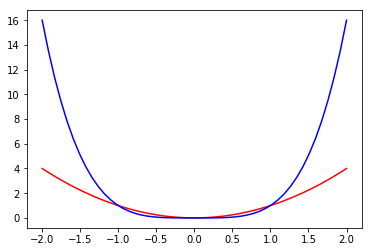

In [11]:
from numpy import *
import math
import matplotlib.pyplot as plt

x = linspace(-2, 2, 50)
y1 = x**2
y2 = y1**2 # = (x**2)**2 = (x^2)^2 = x^4

plt.plot(x, y1, 'r') # plotting t, a separately 
plt.plot(x, y2, 'b') # plotting t, b separately 
plt.show()